## Projet 2021

### Préparation du notebook


<font size="+1" color="RED">**[Q]**</font> **Indiquer dans la boîte ci-dessous vos noms et prénoms :**
Antoine Toullalan,
Rosa Mendas

## Partie 1 - Description du problème

On se positionne du côté developpeur de l'application. On souhaite déterminer le prix d'une application à mettre sur le marché. A partir des données fournies, nous allons tenter de déterminer à quel prix pourrait être lancée une application. Pour ce faire, nous allons baser notre analyse sur une classification non supervisée, notamment grâce à la méthode Kmoyennes.


## Partie 2 - Modèle

On importe les données fournies dans GoogleApps puis on retire les colonnes non utilisées. 
On attribue des identifiants spécifiques à chacun des élements du Dataframe.
L'idée finale serait d'avoir une fonction qui -avec quelques critères données en entrée- nous donnerait une fourchette de prix pour l'application: on se positionne dans un des cluster formés.

Afin de résoudre la problématique: 

On doit d'abord déterminer les paramètres qui influent sur le prix.
On normalise l'ensemble des valeurs du df et on applique Kmoyennes au nouveau df normalisé.
On construit un dictionnaire contenant l'ensemble des moyennes et écarts-types de chaque colonne pour chaque affectation.
Enfin, on crée une fonction qui prend les caractéristiques de l'application en entrée, cherchera l'affectation qui lui convient le plus et retournera une fourchette de prix.

On prend pour hypothèse : 
Retourner un prix en fonction du maximum de critères partagés, dans ce cas on ne regarde pas uniquement la catégorie. 


## Partie 3 - Code Transformation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [2]:
import sys
sys.path.append('../')  

data1 = pd.read_csv("GoogleApps/googleplaystore.csv",encoding='utf-8')
data1.drop(data1.loc[data1['Rating']==19].index, inplace=True) #on supprime la ligne décalée du df
data1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
data=data1.fillna("Empty")
print(data1.shape)
data.drop(data.loc[data['Type']=="Free"].index, inplace=True) #on supprime les applications gratuites car on veut déterminer un prix !
data.drop(data.loc[data['Size']=="Varies with device"].index, inplace=True)
data.head()
print(data.shape)

(10840, 13)
(724, 13)


In [4]:
from datetime import datetime
import re

#Quelques fonctions pour rendre le df plus lisible

def categorisationRU(var):
    return int(var)

def categorisationLU(var):
    return datetime.strptime(var, '%B %d, %Y')

def categorisationPrice(val):
    if val[0]=='$':
        return float(val[1:])
    else:
        return -1

def categorisationSize(val):
    if(type(val)==type("string")):
        if(val=="Varies with device"):
            return 25
        elif(val[-1:]=='K' or val[-1:]=='k'):
            coeff=0.001
        else:
            coeff=1
        val=val[:-1].replace(',','')
        return int(float(val)*coeff)
    return int(val)

def categorisationInstalls(val):
    if(val=="Free"):
        return -1
    return re.sub('[,+]', '', val)

def categorisationRating(val): 
    if val =="Empty":
        return -1
    if float(val)<0 or float(val)>5:
        return -1
    return val
    
listeCurrV=np.unique(data["Current Ver"].values).tolist()
def categorisationCurrV(val): 
    #return listeCurrV.index(val)+1
    L=['1','2','3','4','5','6','7','8']
    if val[0] not in L:
        return 9
    return int(val[0])

listeAndroid=np.unique(data["Android Ver"].values).tolist()
def categorisationAndroid(val): 
    return listeAndroid.index(val)+1


In [5]:
new_android=data["Android Ver"].apply(categorisationAndroid)
data["Android Ver"]=new_android.values

new_prices=data["Price"].apply(categorisationPrice)
data["Price"]=new_prices.values

new_size=data["Size"].apply(categorisationSize)
data["Size"]=new_size.values

new_inst=data["Installs"].apply(categorisationInstalls)
data["Installs"]=new_inst.values

new_lu=data["Last Updated"].apply(categorisationLU)
data["Last Updated"]=new_lu.values

new_Ru=data["Reviews"].apply(categorisationRU)
data["Reviews"]=new_Ru.values

new_rating=data["Rating"].apply(categorisationRating)
data["Rating"]=new_rating.values

new_CurrV=data["Current Ver"].apply(categorisationCurrV)
data["Current Ver"]=new_CurrV.values
print(data.shape)
data.drop(data.loc[data['Rating']==-1].index, inplace=True)
data.drop(data.loc[data['Price']==-1].index, inplace=True)
print(data.shape)
data.head()

(724, 13)
(579, 13)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6,100000,Paid,4.99,Everyone,Business,2018-03-25,1,12
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39,100000,Paid,4.99,Everyone,Business,2017-04-11,3,9
290,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6,100000,Paid,4.99,Everyone,Business,2018-03-25,1,12
291,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39,100000,Paid,4.99,Everyone,Business,2017-04-11,3,9
477,Calculator,DATING,2.6,57,6,1000,Paid,6.99,Everyone,Dating,2017-10-25,1,12


#### A partir de là nous allons tenter de déterminer les critères qui influent sur le prix.


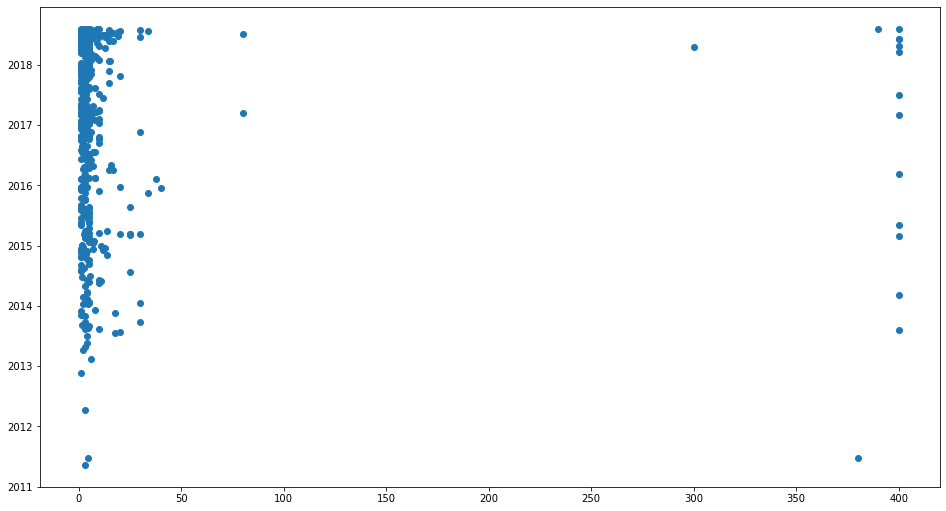

In [6]:
X = np.array(np.sort(data["Price"]))
Y = np.array(data["Last Updated"])
figure = plt.figure(figsize = (25, 25))
plt.gcf().subplots_adjust(left = 0, bottom = 0.1,right = 0.5, top = 0.9, wspace = 0, hspace = 1)
axes = figure.add_subplot(2, 1, 1)
axes.scatter(X,Y)
plt.show()

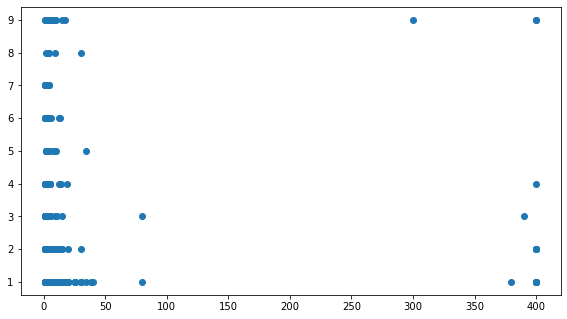

In [7]:
X = np.array(np.sort(data["Price"]))
Y = np.array(data["Current Ver"])
figure = plt.figure(figsize = (15, 15))
plt.gcf().subplots_adjust(left = 0, bottom = 0.1,right = 0.5, top = 0.9, wspace = 0, hspace = 1)
axes = figure.add_subplot(2, 1, 1)
axes.scatter(X,Y)
plt.show()

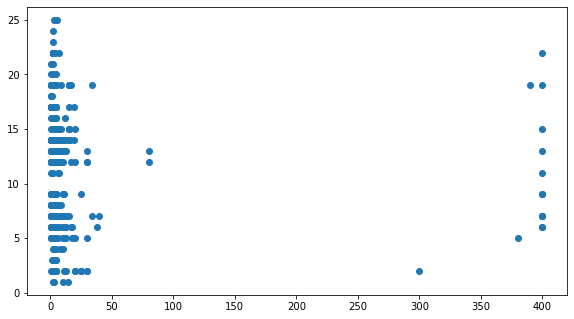

In [8]:
X = np.array(np.sort(data["Price"]))
Y = np.array(data["Android Ver"])
figure = plt.figure(figsize = (15, 15))
plt.gcf().subplots_adjust(left = 0, bottom = 0.1,right = 0.5, top = 0.9, wspace = 0, hspace = 1)
axes = figure.add_subplot(2, 1, 1)
axes.scatter(X,Y)
plt.show()

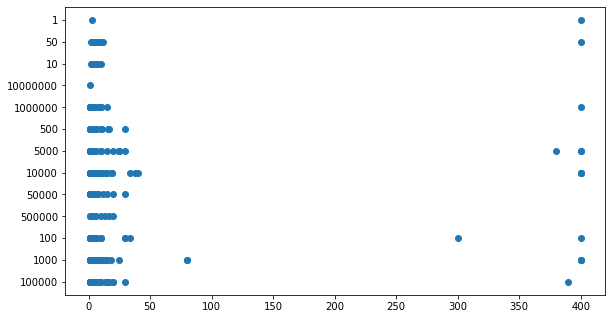

In [9]:
X = np.array(np.sort(data["Price"]))
Y = np.array(data["Installs"])
figure = plt.figure(figsize = (15, 15))
plt.gcf().subplots_adjust(left = 0, bottom = 0.1,right = 0.5, top = 0.9, wspace = 0, hspace = 1)
axes = figure.add_subplot(2, 1, 1)
axes.scatter(X,Y)
plt.show()

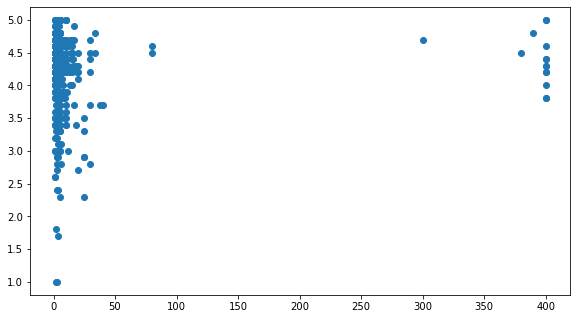

In [10]:
X = np.array(np.sort(data["Price"]))
Y = np.array(data["Rating"])
figure = plt.figure(figsize = (15, 15))
plt.gcf().subplots_adjust(left = 0, bottom = 0.1,right = 0.5, top = 0.9, wspace = 0, hspace = 1)
axes = figure.add_subplot(2, 1, 1)
axes.scatter(X,Y)
plt.show()

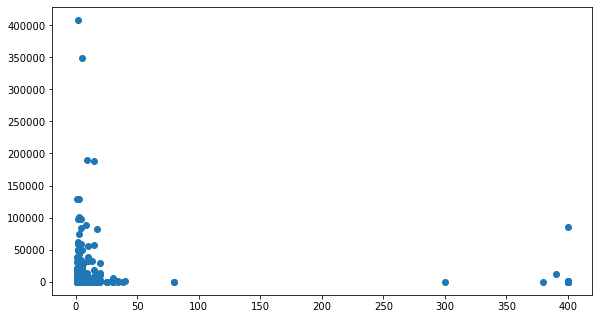

In [11]:
X = np.array(np.sort(data["Price"]))
Y = np.array(data["Reviews"])
figure = plt.figure(figsize = (15, 15))
plt.gcf().subplots_adjust(left = 0, bottom = 0.1,right = 0.5, top = 0.9, wspace = 0, hspace = 1)
axes = figure.add_subplot(2, 1, 1)
axes.scatter(X,Y)
plt.show()
#Le rating semble partager les prix

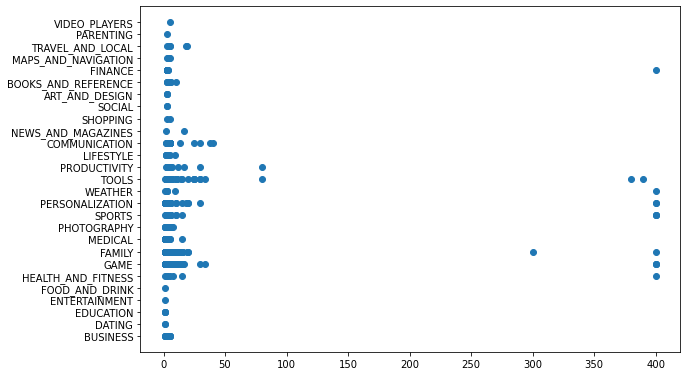

In [12]:
X = np.array(np.sort(data["Price"]))
Y = np.array(data["Category"])
figure = plt.figure(figsize = (15, 15))
plt.gcf().subplots_adjust(left = 0, bottom = 0.1,right = 0.5, top = 0.9, wspace = 0, hspace = 0.5)
axes = figure.add_subplot(2, 1, 1)
axes.scatter(X,Y)
plt.show()
#les category semblent être partagées en fonction des prix !

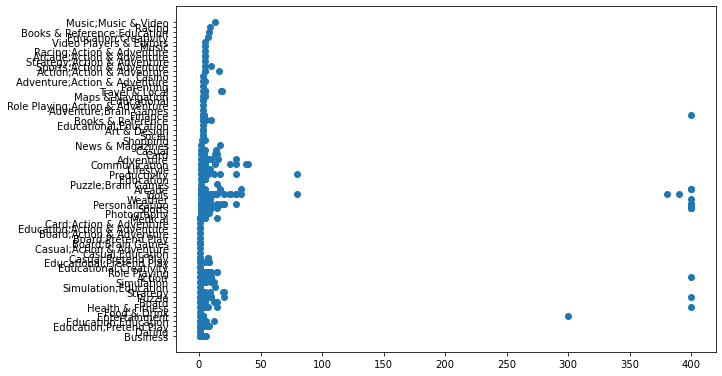

In [13]:
X = np.array(np.sort(data["Price"]))
Y = np.array(data["Genres"])
figure = plt.figure(figsize = (15, 15))
plt.gcf().subplots_adjust(left = 0, bottom = 0.1,right = 0.5, top = 0.9, wspace = 0, hspace = 0.5)
axes = figure.add_subplot(2, 1, 1)
axes.scatter(X,Y)
plt.show()
#les category semblent être partagées en fonction des prix !

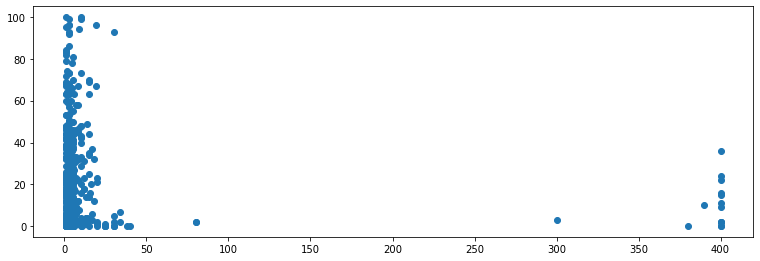

In [14]:
X = np.array(np.sort(data["Price"]))
Y = np.array(data["Size"])
figure = plt.figure(figsize = (10, 10))
plt.gcf().subplots_adjust(left = 0, bottom = 0.1,right = 1, top = 0.9, wspace = 0, hspace = 0.5)
axes = figure.add_subplot(2, 1, 1)
axes.scatter(X,Y)
plt.show()

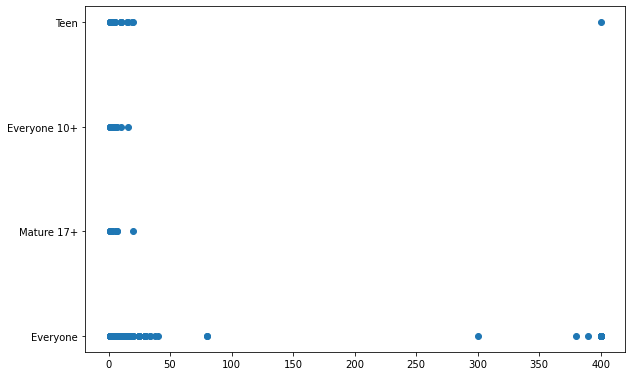

In [15]:
X = np.array(np.sort(data["Price"]))
Y = np.array(data["Content Rating"])
figure = plt.figure(figsize = (15, 15))
plt.gcf().subplots_adjust(left = 0, bottom = 0.1,right = 0.5, top = 0.9, wspace = 0, hspace = 0.5)
axes = figure.add_subplot(2, 1, 1)
axes.scatter(X,Y)
plt.show()

On remarque que certains critères n'évoluent pas en fonction du prix.
D'autres critères ne peuvent pas être fournis lors de la mise au marché d'une application.
Nous tentons alors de retirer certains critères dans le but d'avoir une représentation cohérente.

In [16]:
##On retire les colonnes qui ne nous seront pas utiles
colonnesAEliminer=["Genres","App","Type","Reviews","Rating","Installs","Android Ver","Last Updated",'Content Rating']
data=data.drop(colonnesAEliminer, axis=1)
data.head()

,Category,Size,Price,Current Ver
234,BUSINESS,6,4.99,1
235,BUSINESS,39,4.99,3
290,BUSINESS,6,4.99,1
291,BUSINESS,39,4.99,3
477,DATING,6,6.99,1


In [17]:
listeCateg=np.unique(data["Category"].values).tolist()
def categorisationCateg(val):
    return listeCateg.index(val)+1 
print(listeCateg)

['ART_AND_DESIGN', 'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMMUNICATION', 'DATING', 'EDUCATION', 'ENTERTAINMENT', 'FAMILY', 'FINANCE', 'FOOD_AND_DRINK', 'GAME', 'HEALTH_AND_FITNESS', 'LIFESTYLE', 'MAPS_AND_NAVIGATION', 'MEDICAL', 'NEWS_AND_MAGAZINES', 'PARENTING', 'PERSONALIZATION', 'PHOTOGRAPHY', 'PRODUCTIVITY', 'SHOPPING', 'SOCIAL', 'SPORTS', 'TOOLS', 'TRAVEL_AND_LOCAL', 'VIDEO_PLAYERS', 'WEATHER']


In [18]:
new_category=data["Category"].apply(categorisationCateg)
data["Category"]=new_category.values

print(data.shape)
data.tail()

(579, 4)


,Category,Size,Price,Current Ver
10690,18,0,0.99,9
10697,11,16,0.99,1
10760,12,2,7.99,1
10782,11,11,16.99,2
10785,8,9,1.20,2


## Partie 3 - Code Problématique

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from statistics import mean
%matplotlib inline

import sys
sys.path.append('../')  

import iads as iads

# importation de Classifiers
from iads import Classifiers as classif

# importation de utils
from iads import utils as ut

data.head()


,Category,Size,Price,Current Ver
234,3,6,4.99,1
235,3,39,4.99,3
290,3,6,4.99,1
291,3,39,4.99,3
477,5,6,6.99,1


On crée une fonction retour_prix capable de retourner un prix cohérent grâce à une liste d'affectations des clusters et des critères donnés en paramètres.

In [20]:
def most_common(lst):
    #Retourne l'élement le plus présent dans la liste
    return max(set(lst), key=lst.count)

def retour_prix(df, Categ, Size, CurrentVer):
    #Retourne en fonction des paramètres l'indice de df contenant des valeurs proches de celles des 
    #caractéristiques recherchées
    liste = {}
    for i in range(3):
        liste[i]=[]
        
    for i in df:
        moy=df[i][0]
        ec = df[i][1]
        #si élément compris entre moyenne et écart-type
        if Categ <= moy[0]+ec[0] and Categ >= moy[0]-ec[0]:
            liste[0].append(i)
        if Size <= moy[1]+ec[1] and Size >= moy[1]-ec[1]:
            liste[1].append(i)
        if CurrentVer <= moy[3]+ec[3] and CurrentVer >= moy[3]-ec[3]:
            liste[2].append(i)
            
    L = []
    for i in range(3):
        L+=liste[i]
    return most_common(L) #on retourne le cluster ayant un max de points communs avec les param en entrée
        

## Partie 4 - Protocole expérimental

Dans cette partie, on tente de vérifier que notre code et raisonnement sont bons. Par la suite, on tente de déterminer un futur prix et voir sa cohérence.

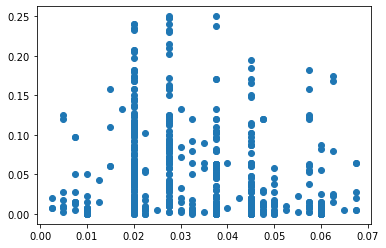

In [21]:
colonnes = data.columns
data_desc1 = np.array(data[colonnes])
data_desc1 = ut.normalisation(data_desc1)
plt.scatter(data_desc1[:,0],data_desc1[:,1])

In [22]:
listePrices = np.unique(data["Price"].values).tolist()
print(listePrices)
print(len(listePrices))

[0.99, 1.0, 1.2, 1.29, 1.49, 1.5, 1.59, 1.61, 1.7, 1.75, 1.76, 1.97, 1.99, 2.0, 2.49, 2.56, 2.59, 2.9, 2.99, 3.02, 3.04, 3.08, 3.28, 3.49, 3.88, 3.99, 4.29, 4.49, 4.6, 4.77, 4.84, 4.99, 5.49, 5.99, 6.49, 6.99, 7.49, 7.99, 8.49, 8.99, 9.0, 9.99, 10.0, 10.99, 11.99, 12.99, 13.99, 14.0, 14.99, 15.46, 15.99, 16.99, 17.99, 18.99, 19.4, 19.99, 24.99, 29.99, 33.99, 37.99, 39.99, 79.99, 299.99, 379.99, 389.99, 399.99, 400.0]
67


Pour la suite du problème on fixe K à 30 afin d'avoir - si possible- un cluster par tranche de prix tout en considérant les autres paramètres.
On tente de vérifier que les prix prédis sont cohérents comparés aux prix actuels des applications.

Fini


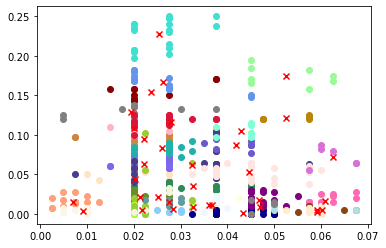

In [52]:
K=35
centres1,affectation1 = ut.kmoyennes(K, data_desc1, 0.05, 100)
ut.affiche_resultat(data_desc1,centres1,affectation1,K)


In [53]:
columns=data.columns
liste1 = {}
for c in affectation1:
    tab = (data[columns].iloc[affectation1[int(c)]]).agg(["mean", "std"])
    #Moyenne et Ecart-Type
    liste1[int(c)] = tab.values

In [54]:
###ICI ON FAIT NOTRE DEMANDE:
#Veuillez indiquer selon ce tableau, les caractéristiques de votre application
print("On teste Sago Mini Hat Maker, prix = $3.99")
Categ = categorisationCateg("EDUCATION")
size = categorisationSize("63M")
inst = categorisationInstalls("1,000+")
LU = categorisationLU("July 21, 2017")
CurrV = categorisationCurrV("1.3")

categ1 = retour_prix(liste1,Categ,size,CurrV)
prix1 = liste1[categ1][0][2]
ec1 = liste1[categ1][1][2]
prix1 = liste1[categ1][0][2]
print("\nPrix moyen du cluster: $",round(prix1,2))
print("Avec un écart-type de: $",round(ec1,2))

On teste Sago Mini Hat Maker, prix = $3.99

Prix moyen du cluster: $ 2.61
Avec un écart-type de: $ 1.56


In [55]:
###ICI ON FAIT NOTRE DEMANDE:
#Veuillez indiquer selon ce tableau, les caractéristiques de votre application
print("On teste Calculator, prix = $6.99")
Categ = categorisationCateg("DATING")
size = categorisationSize("6.2M")
CurrV = categorisationCurrV("1.1.6")

categ1 = retour_prix(liste1,Categ,size,CurrV)
prix1 = liste1[categ1][0][2]
ec1 = liste1[categ1][1][2]
prix1 = liste1[categ1][0][2]
print("\nPrix moyen du cluster: $",round(prix1,2))
print("Avec un écart-type de: $",round(ec1,2))

On teste Calculator, prix = $6.99

Prix moyen du cluster: $ 3.74
Avec un écart-type de: $ 2.23


In [56]:
###ICI ON FAIT NOTRE DEMANDE:
#Veuillez indiquer selon ce tableau, les caractéristiques de votre application
print("On teste Monument Valley 2, prix = $4.99")
Categ = categorisationCateg("GAME")
size = categorisationSize("33M")
CurrV = categorisationCurrV("1.2.9")

categ1 = retour_prix(liste1,Categ,size,CurrV)
prix1 = liste1[categ1][0][2]
ec1 = liste1[categ1][1][2]
prix1 = liste1[categ1][0][2]
print("\nPrix moyen du cluster: $",round(prix1,2))
print("Avec un écart-type de: $",round(ec1,2))

On teste Monument Valley 2, prix = $4.99

Prix moyen du cluster: $ 4.52
Avec un écart-type de: $ 2.65


In [57]:
###ICI ON FAIT NOTRE DEMANDE:
#Veuillez indiquer selon ce tableau, les caractéristiques de votre application
print("On teste Dress Up RagazzA13 DX, prix = $0.99")
Categ = categorisationCateg("FAMILY")
size = categorisationSize("42M")
CurrV = categorisationCurrV("1.0.5")

categ1 = retour_prix(liste1,Categ,size,CurrV)
prix1 = liste1[categ1][0][2]
ec1 = liste1[categ1][1][2]
prix1 = liste1[categ1][0][2]
print("\nPrix moyen du cluster: $",round(prix1,2))
print("Avec un écart-type de: $",round(ec1,2))

On teste Dress Up RagazzA13 DX, prix = $0.99

Prix moyen du cluster: $ 2.65
Avec un écart-type de: $ 1.58


#### Limites du code:

In [58]:
###ICI ON FAIT NOTRE DEMANDE:
#Veuillez indiquer selon ce tableau, les caractéristiques de votre application
print("On teste I am rich(premium), prix = $399.99")
Categ = categorisationCateg("FINANCE")
size = categorisationSize("965k")
CurrV = categorisationCurrV("3.4")

categ1 = retour_prix(liste1,Categ,size,CurrV)
prix1 = liste1[categ1][0][2]
ec1 = liste1[categ1][1][2]
prix1 = liste1[categ1][0][2]
print("\nPrix moyen du cluster: $",round(prix1,2))
print("Avec un écart-type de: $",round(ec1,2))

On teste I am rich(premium), prix = $399.99

Prix moyen du cluster: $ 3.03
Avec un écart-type de: $ 1.65


In [59]:
L= data.loc[data['Price']>=50]
print(L,"\n\nIl y a ",len(L),'valeurs noyées ! sur',data.shape[0])
#Il n'y a que quelques valeurs dont les prix dépassent les $50
#On peut dire que les différences de taille et de catégories 
#rendent le modèle plus complexe. De plus, dans chacune des catégories,
#la moyenne des prix est largement inférieure à ces prix. 
#Tout cela justifie pourquoi l'algorithme ne trouve pas le prix.

      Category  Size   Price  Current Ver
2253        15    32   79.99            1
2365        15    32   79.99            1
4197         8     1  399.99            1
4362        13    26  399.99            1
4367        13     7  400.00            1
5351        13     1  399.99            2
5354         8     8  399.99            3
5355        13     2  299.99            1
5356         9     4  399.99            1
5357        13     2  379.99            1
5358         9    22  399.99            1
5359         9     0  399.99            3
5362         8     2  399.99            1
5364         9     2  399.99            2
5366         8     4  389.99            1
5369         9     3  399.99            1
5373         9    41  399.99            1 

Il y a  17 valeurs noyées ! sur 579


## Partie 5 - Résultats

On remarque que les données sont réparties pour la plupart de manière cohérente au sein des clusters. On retrouve les prix recherchés initialement en fonction des arguments passés en paramètres.

Les résultats sont rendus en fonction de la catégorie, de la taille, mais aussi de la dernière version réalisée étant les critères les plus influents sur le prix.
Les résultats sont compris entre prix de base du cluster +- écart-type.


## Partie 6 - Analyse

Lors de l'affichage des prix, nous remarquons que la plupart des prix sont compris dans la fourchette énoncée.
L'algorithme Kmoyennes nous a permis de déterminer de manière rapide et simple le prix d'une application accompagné d'une marge.

Toutefois, Kmoyennes ne permet pas, de gérer les formes complexes.
Quelques prix au sein d'une même catégorie ont des valeurs beaucoup trop éloignées de la moyenne et ne sont pas pris en compte dans le bon cluster.